# Step 1: Importing all important libraries.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Step 2: Define data loader function.

In [2]:
def load_data(base_dir, img_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255)

    train_loader = datagen.flow_from_directory(
        os.path.join(base_dir, "train"),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    val_loader = datagen.flow_from_directory(
        os.path.join(base_dir, "val"),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_loader = datagen.flow_from_directory(
        os.path.join(base_dir, "test"),
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_loader, val_loader, test_loader


# Step 3: Configuration Path and Parameters.

In [3]:
BASE_DIR = r"C:\users\harsh\Downloads\TrainingData\dataset_split"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100
MODEL_PATH = "best_model_val_acc.h5"


# Step 4: Load train/val data

In [4]:
train_loader, val_loader, test_loader = load_data(BASE_DIR, IMG_SIZE, BATCH_SIZE)


Found 1139 images belonging to 6 classes.
Found 324 images belonging to 6 classes.
Found 169 images belonging to 6 classes.


# Step 5: Build MobileNetV2 model for transfer learning

In [5]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(train_loader.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


# Step 6:Define callbacks

In [6]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    MODEL_PATH,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)


# Step 7: Train the Model

In [7]:
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

print(f" Best model saved to: {MODEL_PATH}")


Epoch 1/100


c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.1956 - loss: 2.0810
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 598ms/step - accuracy: 0.1964 - loss: 2.0772 - val_accuracy: 0.2500 - val_loss: 1.7173
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.3199 - loss: 1.6847
Epoch 2: val_accuracy improved from 0.25000 to 0.39815, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 520ms/step - accuracy: 0.3210 - loss: 1.6829 - val_accuracy: 0.3981 - val_loss: 1.5183
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.4363 - loss: 1.4827
Epoch 3: val_accuracy improved from 0.39815 to 0.50926, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 537ms/step - accuracy: 0.4371 - loss: 1.4815 - val_accuracy: 0.5093 - val_loss: 1.3702
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5023 - loss: 1.3629
Epoch 4: val_accuracy improved from 0.50926 to 0.57407, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 516ms/step - accuracy: 0.5032 - loss: 1.3614 - val_accuracy: 0.5741 - val_loss: 1.2567
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.6050 - loss: 1.2157
Epoch 5: val_accuracy improved from 0.57407 to 0.64198, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 517ms/step - accuracy: 0.6048 - loss: 1.2153 - val_accuracy: 0.6420 - val_loss: 1.1714
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.6249 - loss: 1.1412
Epoch 6: val_accuracy improved from 0.64198 to 0.65123, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 534ms/step - accuracy: 0.6249 - loss: 1.1407 - val_accuracy: 0.6512 - val_loss: 1.0999
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.6493 - loss: 1.0760
Epoch 7: val_accuracy improved from 0.65123 to 0.66358, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.6494 - loss: 1.0755 - val_accuracy: 0.6636 - val_loss: 1.0462
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6763 - loss: 1.0258
Epoch 8: val_accuracy improved from 0.66358 to 0.68519, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 529ms/step - accuracy: 0.6766 - loss: 1.0252 - val_accuracy: 0.6852 - val_loss: 0.9983
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6891 - loss: 0.9639
Epoch 9: val_accuracy improved from 0.68519 to 0.69753, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 514ms/step - accuracy: 0.6893 - loss: 0.9637 - val_accuracy: 0.6975 - val_loss: 0.9599
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7134 - loss: 0.9273
Epoch 10: val_accuracy improved from 0.69753 to 0.70679, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 510ms/step - accuracy: 0.7134 - loss: 0.9271 - val_accuracy: 0.7068 - val_loss: 0.9285
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.7385 - loss: 0.8528
Epoch 11: val_accuracy improved from 0.70679 to 0.71914, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 513ms/step - accuracy: 0.7378 - loss: 0.8538 - val_accuracy: 0.7191 - val_loss: 0.8995
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.7220 - loss: 0.8567
Epoch 12: val_accuracy did not improve from 0.71914
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 529ms/step - accuracy: 0.7222 - loss: 0.8569 - val_accuracy: 0.7068 - val_loss: 0.8781
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7314 - loss: 0.8190
Epoch 13: val_accuracy did not improve from 0.71914
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 543ms/step - accuracy: 0.7313 - loss: 0.8195 - val_accuracy: 0.7130 - val_loss: 0.8548
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7333 - loss: 0.8366
Epoch 14: val_accuracy improved from 0.71914 to 0.72531, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 543ms/step - accuracy: 0.7335 - loss: 0.8360 - val_accuracy: 0.7253 - val_loss: 0.8347
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.7407 - loss: 0.8042
Epoch 15: val_accuracy did not improve from 0.72531
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 536ms/step - accuracy: 0.7409 - loss: 0.8040 - val_accuracy: 0.7253 - val_loss: 0.8183
Epoch 16/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7496 - loss: 0.7937
Epoch 16: val_accuracy improved from 0.72531 to 0.73148, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 544ms/step - accuracy: 0.7497 - loss: 0.7933 - val_accuracy: 0.7315 - val_loss: 0.8039
Epoch 17/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.7499 - loss: 0.7860
Epoch 17: val_accuracy improved from 0.73148 to 0.73765, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 571ms/step - accuracy: 0.7500 - loss: 0.7854 - val_accuracy: 0.7377 - val_loss: 0.7877
Epoch 18/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7585 - loss: 0.7639
Epoch 18: val_accuracy did not improve from 0.73765
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 549ms/step - accuracy: 0.7586 - loss: 0.7634 - val_accuracy: 0.7315 - val_loss: 0.7775
Epoch 19/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.7600 - loss: 0.7330
Epoch 19: val_accuracy did not improve from 0.73765
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 514ms/step - accuracy: 0.7600 - loss: 0.7330 - val_accuracy: 0.7377 - val_loss: 0.7626
Epoch 20/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.7900 - loss: 0.6985
Epoch 20: val_accuracy did not improve from 0.73765
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.7892 - loss: 0.6991 - val_accuracy: 0.7346 - val_loss: 0.7545
Epoch 21/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.7611 - loss: 0.7132
Epoch 21: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 519ms/step - accuracy: 0.7612 - loss: 0.7131 - val_accuracy: 0.7438 - val_loss: 0.7420
Epoch 22/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7598 - loss: 0.7112
Epoch 22: val_accuracy improved from 0.74383 to 0.74691, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 547ms/step - accuracy: 0.7600 - loss: 0.7109 - val_accuracy: 0.7469 - val_loss: 0.7339
Epoch 23/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.7811 - loss: 0.6634
Epoch 23: val_accuracy improved from 0.74691 to 0.75617, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 562ms/step - accuracy: 0.7806 - loss: 0.6641 - val_accuracy: 0.7562 - val_loss: 0.7214
Epoch 24/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.7710 - loss: 0.6897
Epoch 24: val_accuracy improved from 0.75617 to 0.75926, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 555ms/step - accuracy: 0.7712 - loss: 0.6894 - val_accuracy: 0.7593 - val_loss: 0.7143
Epoch 25/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.7904 - loss: 0.6462
Epoch 25: val_accuracy improved from 0.75926 to 0.76543, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 554ms/step - accuracy: 0.7898 - loss: 0.6469 - val_accuracy: 0.7654 - val_loss: 0.7060
Epoch 26/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7856 - loss: 0.6586
Epoch 26: val_accuracy did not improve from 0.76543
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.7855 - loss: 0.6586 - val_accuracy: 0.7623 - val_loss: 0.7012
Epoch 27/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7747 - loss: 0.6234
Epoch 27: val_accuracy did not improve from 0.76543
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 556ms/step - accuracy: 0.7748 - loss: 0.6241 - val_accuracy: 0.7593 - val_loss: 0.6920
Epoch 28/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.7852 - loss: 0.6623
Epoch 28: val_accuracy improved from 0.76543 to 0.76852, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 548ms/step - accuracy: 0.7852 - loss: 0.6619 - val_accuracy: 0.7685 - val_loss: 0.6884
Epoch 29/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.8001 - loss: 0.6305
Epoch 29: val_accuracy did not improve from 0.76852
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 532ms/step - accuracy: 0.7998 - loss: 0.6307 - val_accuracy: 0.7562 - val_loss: 0.6804
Epoch 30/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7916 - loss: 0.6502
Epoch 30: val_accuracy did not improve from 0.76852
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 527ms/step - accuracy: 0.7916 - loss: 0.6497 - val_accuracy: 0.7593 - val_loss: 0.6751
Epoch 31/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8010 - loss: 0.6125
Epoch 31: val_accuracy did not improve from 0.76852
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 515ms/step - accuracy: 0.8006 - loss: 0.6129 - val_accuracy: 0.7531 - val_loss: 0.6680
Epoch 32/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.7870 - loss: 0.6118
Epoch 32: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step - accuracy: 0.7905 - loss: 0.6145 - val_accuracy: 0.7716 - val_loss: 0.6524
Epoch 35/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7912 - loss: 0.6038
Epoch 35: val_accuracy did not improve from 0.77160
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 559ms/step - accuracy: 0.7913 - loss: 0.6036 - val_accuracy: 0.7716 - val_loss: 0.6464
Epoch 36/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8221 - loss: 0.5640
Epoch 36: val_accuracy improved from 0.77160 to 0.78086, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 586ms/step - accuracy: 0.8215 - loss: 0.5649 - val_accuracy: 0.7809 - val_loss: 0.6439
Epoch 37/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8195 - loss: 0.5649
Epoch 37: val_accuracy did not improve from 0.78086
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step - accuracy: 0.8190 - loss: 0.5655 - val_accuracy: 0.7716 - val_loss: 0.6377
Epoch 38/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.8049 - loss: 0.5891
Epoch 38: val_accuracy did not improve from 0.78086
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 534ms/step - accuracy: 0.8049 - loss: 0.5889 - val_accuracy: 0.7716 - val_loss: 0.6314
Epoch 39/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.8047 - loss: 0.5908
Epoch 39: val_accuracy did not improve from 0.78086
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 535ms/step - accuracy: 0.8047 - loss: 0.5905 - val_accuracy: 0.7747 - val_loss: 0.6307
Epoch 40/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8168 - loss: 0.5427
Epoch 40: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 540ms/step - accuracy: 0.8198 - loss: 0.5560 - val_accuracy: 0.7840 - val_loss: 0.6154
Epoch 44/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.8058 - loss: 0.5605
Epoch 44: val_accuracy did not improve from 0.78395
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 550ms/step - accuracy: 0.8060 - loss: 0.5603 - val_accuracy: 0.7840 - val_loss: 0.6096
Epoch 45/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.8192 - loss: 0.5338
Epoch 45: val_accuracy improved from 0.78395 to 0.79012, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 533ms/step - accuracy: 0.8190 - loss: 0.5343 - val_accuracy: 0.7901 - val_loss: 0.6071
Epoch 46/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8129 - loss: 0.5556
Epoch 46: val_accuracy did not improve from 0.79012
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 513ms/step - accuracy: 0.8129 - loss: 0.5554 - val_accuracy: 0.7840 - val_loss: 0.6031
Epoch 47/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.8190 - loss: 0.5411
Epoch 47: val_accuracy did not improve from 0.79012
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 510ms/step - accuracy: 0.8190 - loss: 0.5411 - val_accuracy: 0.7747 - val_loss: 0.6019
Epoch 48/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8173 - loss: 0.5372
Epoch 48: val_accuracy did not improve from 0.79012
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 516ms/step - accuracy: 0.8172 - loss: 0.5373 - val_accuracy: 0.7778 - val_loss: 0.6000
Epoch 49/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.8085 - loss: 0.5546
Epoch 49: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.8104 - loss: 0.5262 - val_accuracy: 0.7932 - val_loss: 0.5843
Epoch 53/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.8215 - loss: 0.5150
Epoch 53: val_accuracy did not improve from 0.79321
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 524ms/step - accuracy: 0.8216 - loss: 0.5151 - val_accuracy: 0.7932 - val_loss: 0.5822
Epoch 54/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8192 - loss: 0.5310
Epoch 54: val_accuracy improved from 0.79321 to 0.79630, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 562ms/step - accuracy: 0.8194 - loss: 0.5306 - val_accuracy: 0.7963 - val_loss: 0.5802
Epoch 55/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.8409 - loss: 0.5229
Epoch 55: val_accuracy did not improve from 0.79630
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 535ms/step - accuracy: 0.8405 - loss: 0.5227 - val_accuracy: 0.7870 - val_loss: 0.5788
Epoch 56/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8248 - loss: 0.4886
Epoch 56: val_accuracy did not improve from 0.79630
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 527ms/step - accuracy: 0.8248 - loss: 0.4892 - val_accuracy: 0.7963 - val_loss: 0.5755
Epoch 57/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.8444 - loss: 0.4950
Epoch 57: val_accuracy improved from 0.79630 to 0.80556, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 536ms/step - accuracy: 0.8440 - loss: 0.4953 - val_accuracy: 0.8056 - val_loss: 0.5700
Epoch 58/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.8311 - loss: 0.4922
Epoch 58: val_accuracy did not improve from 0.80556
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 529ms/step - accuracy: 0.8309 - loss: 0.4926 - val_accuracy: 0.7932 - val_loss: 0.5693
Epoch 59/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.8255 - loss: 0.5284
Epoch 59: val_accuracy did not improve from 0.80556
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 526ms/step - accuracy: 0.8258 - loss: 0.5277 - val_accuracy: 0.7963 - val_loss: 0.5711
Epoch 60/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8262 - loss: 0.5123
Epoch 60: val_accuracy did not improve from 0.80556
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 533ms/step - accuracy: 0.8265 - loss: 0.5119 - val_accuracy: 0.7994 - val_loss: 0.5661
Epoch 61/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.8208 - loss: 0.5126
Epoch 61: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 534ms/step - accuracy: 0.8483 - loss: 0.4623 - val_accuracy: 0.8117 - val_loss: 0.5476
Epoch 69/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8362 - loss: 0.4904
Epoch 69: val_accuracy did not improve from 0.81173
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 524ms/step - accuracy: 0.8364 - loss: 0.4899 - val_accuracy: 0.8117 - val_loss: 0.5459
Epoch 70/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8368 - loss: 0.4896
Epoch 70: val_accuracy did not improve from 0.81173
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 524ms/step - accuracy: 0.8367 - loss: 0.4891 - val_accuracy: 0.8086 - val_loss: 0.5463
Epoch 71/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8554 - loss: 0.4730
Epoch 71: val_accuracy did not improve from 0.81173
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 558ms/step - accuracy: 0.8552 - loss: 0.4729 - val_accuracy: 0.7994 - val_loss: 0.5471
Epoch 72/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8412 - loss: 0.4674
Epoch 72: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 536ms/step - accuracy: 0.8477 - loss: 0.4536 - val_accuracy: 0.8179 - val_loss: 0.5306
Epoch 80/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.8467 - loss: 0.4680
Epoch 80: val_accuracy did not improve from 0.81790
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 518ms/step - accuracy: 0.8468 - loss: 0.4675 - val_accuracy: 0.8179 - val_loss: 0.5302
Epoch 81/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8433 - loss: 0.4532
Epoch 81: val_accuracy did not improve from 0.81790
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 517ms/step - accuracy: 0.8435 - loss: 0.4530 - val_accuracy: 0.8148 - val_loss: 0.5292
Epoch 82/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8430 - loss: 0.4476
Epoch 82: val_accuracy did not improve from 0.81790
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 512ms/step - accuracy: 0.8430 - loss: 0.4475 - val_accuracy: 0.8179 - val_loss: 0.5246
Epoch 83/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8649 - loss: 0.4175
Epoch 83: val_accura

36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step - accuracy: 0.8669 - loss: 0.4218 - val_accuracy: 0.8241 - val_loss: 0.5193
Epoch 89/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8477 - loss: 0.4384
Epoch 89: val_accuracy did not improve from 0.82407
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 522ms/step - accuracy: 0.8479 - loss: 0.4381 - val_accuracy: 0.8117 - val_loss: 0.5210
Epoch 90/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.8523 - loss: 0.4121
Epoch 90: val_accuracy did not improve from 0.82407
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 512ms/step - accuracy: 0.8524 - loss: 0.4124 - val_accuracy: 0.8179 - val_loss: 0.5187
Epoch 91/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8448 - loss: 0.4295
Epoch 91: val_accuracy improved from 0.82407 to 0.82716, saving model to best_model_val_acc.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 544ms/step - accuracy: 0.8450 - loss: 0.4294 - val_accuracy: 0.8272 - val_loss: 0.5134
Epoch 92/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8637 - loss: 0.4140
Epoch 92: val_accuracy did not improve from 0.82716
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 550ms/step - accuracy: 0.8636 - loss: 0.4142 - val_accuracy: 0.8241 - val_loss: 0.5151
Epoch 93/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.8522 - loss: 0.4424
Epoch 93: val_accuracy did not improve from 0.82716
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 510ms/step - accuracy: 0.8524 - loss: 0.4418 - val_accuracy: 0.8210 - val_loss: 0.5141
Epoch 94/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.8611 - loss: 0.3994
Epoch 94: val_accuracy did not improve from 0.82716
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 515ms/step - accuracy: 0.8611 - loss: 0.3999 - val_accuracy: 0.8272 - val_loss: 0.5098
Epoch 95/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8406 - loss: 0.4356
Epoch 95: val_accura

# Step 8: Plot training vs validation accuracy

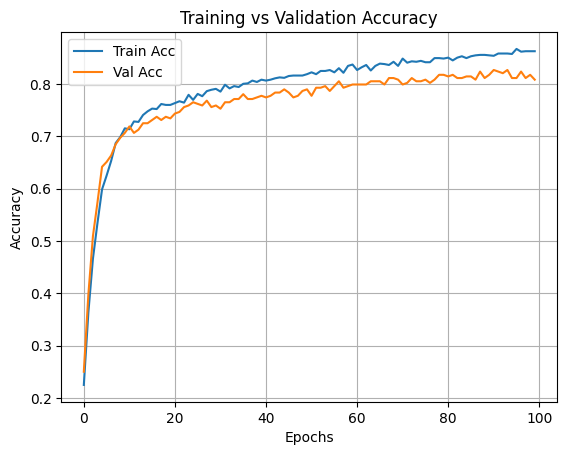

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Step 9: Evaluate model on test set.

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step


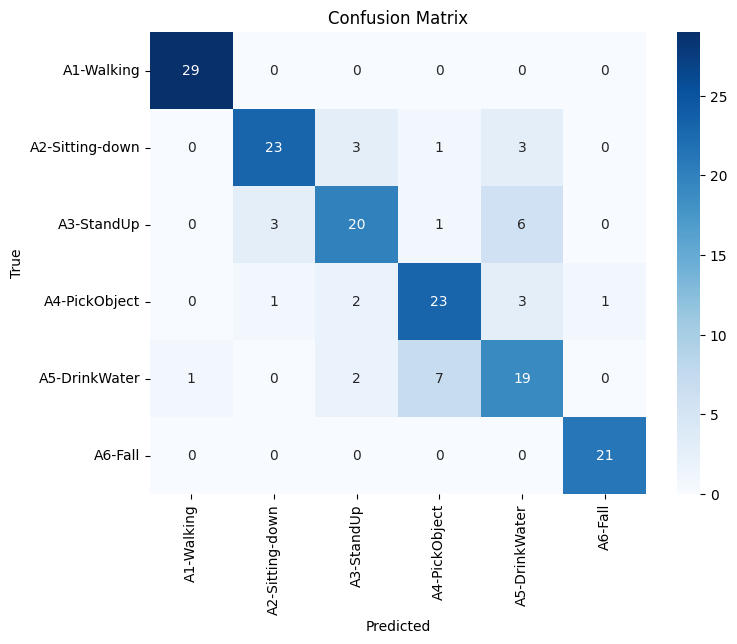

Classification Report:

                 precision    recall  f1-score   support

     A1-Walking       0.97      1.00      0.98        29
A2-Sitting-down       0.85      0.77      0.81        30
     A3-StandUp       0.74      0.67      0.70        30
  A4-PickObject       0.72      0.77      0.74        30
  A5-DrinkWater       0.61      0.66      0.63        29
        A6-Fall       0.95      1.00      0.98        21

       accuracy                           0.80       169
      macro avg       0.81      0.81      0.81       169
   weighted avg       0.80      0.80      0.80       169



In [9]:
model = load_model(MODEL_PATH)

y_true = test_loader.classes
class_labels = list(test_loader.class_indices.keys())
y_pred = np.argmax(model.predict(test_loader), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))
